In [17]:
from sage.all import RR, sqrt, vector, VectorSpace
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gram_schmidt_R(vectors):
    """
    Performs the Gram–Schmidt process on a list of real SageMath vectors
    to produce an orthonormal basis.

    Parameters
    ----------
    vectors : list[Vector]
        A list of linearly independent SageMath vectors over RR.

    Returns
    -------
    list[Vector]
        An orthonormal list of vectors spanning the same subspace as the input.
    """
    def dot(u, v):
        return sum(ui * vi for ui, vi in zip(u, v))

    orthonormal_basis = []
    for v in vectors:
        # Subtract projections onto previous basis vectors
        for u in orthonormal_basis:
            v = v - dot(v, u) * u
        # Normalize
        v = v / sqrt(dot(v, v))
        orthonormal_basis.append(v)

    return orthonormal_basis


In [18]:
v1 = vector(RR, [1, 1, 0])
v2 = vector(RR, [1, 0, 1])
v3 = vector(RR, [0, 1, 1])

basis = gram_schmidt_R([v1, v2, v3])
for i, b in enumerate(basis, start=1):
    print(f"u{i} =", b, f"‖u{i}‖² =", b.dot_product(b))

u1 = (0.707106781186547, 0.707106781186547, 0.000000000000000) ‖u1‖² = 1.00000000000000
u2 = (0.408248290463863, -0.408248290463863, 0.816496580927726) ‖u2‖² = 1.00000000000000
u3 = (-0.577350269189626, 0.577350269189626, 0.577350269189626) ‖u3‖² = 1.00000000000000


Original basis:
(1, 0, 1)
(1, -1, 1)
(1, 1, 2)

Orthonormal basis:
(1/2*sqrt(2), 0, 1/2*sqrt(2))
(0, -1, 0)
(-sqrt(1/2), 0, sqrt(1/2))


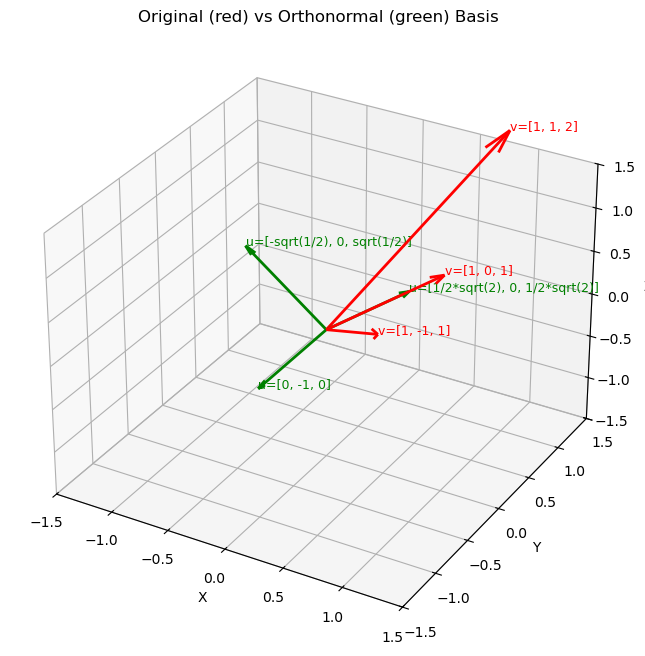

In [19]:
# Using the previous function to copmute the orthonormal basis for a given set of vectors
V = VectorSpace(QQ, 3)
original_basis = [V([1, 0, 1]), V([1, -1, 1]), V([1, 1, 2])]

# Compute orthonormal basis
orthonormal_basis = gram_schmidt_R(original_basis)

# Display results
print("Original basis:")
for v in original_basis:
    print(v)

print("\nOrthonormal basis:")
for u in orthonormal_basis:
    print(u)


# --- Visualization with Matplotlib ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = [0, 0, 0]

# Plot original basis (red)
for v in original_basis:
    ax.quiver(*origin, v[0], v[1], v[2], color='red', linewidth=2, arrow_length_ratio=0.1)
    ax.text(v[0], v[1], v[2], f'v={list(v)}', color='red', fontsize=9)

# Plot orthonormal basis (green)
for u in orthonormal_basis:
    ax.quiver(*origin, u[0], u[1], u[2], color='green', linewidth=2, arrow_length_ratio=0.1)
    ax.text(u[0], u[1], u[2], f'u={list(u)}', color='green', fontsize=9)

# Labels and styling
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original (red) vs Orthonormal (green) Basis')

plt.show()


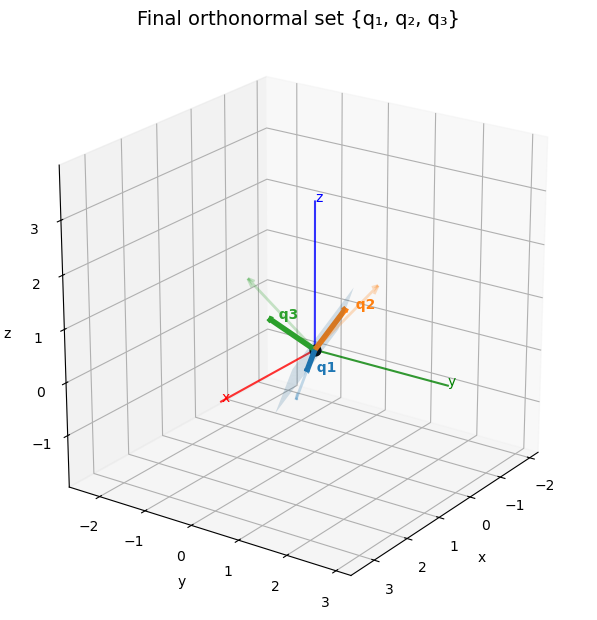

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (registers 3D)
from IPython.display import HTML, display

# ----------------------------
# Linear algebra: Modified Gram–Schmidt
# ----------------------------
def modified_gram_schmidt(V, eps=1e-12):
    V = np.asarray(V, float)
    n, d = V.shape
    Q = np.zeros((n, d))
    R = np.zeros((n, n))
    U_steps = []
    Proj_steps = []

    for k in range(n):
        v_k = V[k].copy()
        proj_parts = []
        for j in range(k):
            R[j, k] = np.dot(Q[j], v_k)
            proj = R[j, k] * Q[j]
            v_k -= proj
            proj_parts.append({"onto_index": j, "proj_vec": proj})
        R[k, k] = np.linalg.norm(v_k)
        if R[k, k] < eps:
            raise ValueError("Vectors are linearly dependent or nearly so.")
        u_k = v_k.copy()
        q_k = v_k / R[k, k]
        Q[k] = q_k
        U_steps.append(u_k)
        Proj_steps.append({"k": k, "projections": proj_parts})
    return Q, R, U_steps, Proj_steps

# ----------------------------
# Drawing helpers
# ----------------------------
def set_equal_3d(ax, margin=0.5):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
    x_range = x_limits[1] - x_limits[0]
    y_range = y_limits[1] - y_limits[0]
    z_range = z_limits[1] - z_limits[0]
    max_range = max(x_range, y_range, z_range)
    mid_x = 0.5*(x_limits[0]+x_limits[1])
    mid_y = 0.5*(y_limits[0]+y_limits[1])
    mid_z = 0.5*(z_limits[0]+z_limits[1])
    half = 0.5*max_range + margin
    ax.set_xlim(mid_x - half, mid_x + half)
    ax.set_ylim(mid_y - half, mid_y + half)
    ax.set_zlim(mid_z - half, mid_z + half)
    try:
        ax.set_box_aspect([1,1,1])
    except Exception:
        pass

def draw_vec(ax, v, color="C0", lw=3, label=None, alpha=1.0, arrow_ratio=0.1):
    v = np.asarray(v, float)
    ax.quiver(0,0,0, v[0],v[1],v[2], arrow_length_ratio=arrow_ratio,
              color=color, linewidth=lw, alpha=alpha)
    if label:
        ax.text(v[0], v[1], v[2], f"  {label}", color=color, fontsize=10, weight="bold")

def draw_segment(ax, a, b, color="k", lw=2, style="-", alpha=0.9):
    a, b = np.asarray(a, float), np.asarray(b, float)
    ax.plot([a[0], b[0]], [a[1], b[1]], [a[2], b[2]],
            linestyle=style, color=color, linewidth=lw, alpha=alpha)

def draw_axes(ax, length=3.0):
    ax.plot([0, length], [0, 0], [0, 0], color="r", lw=1.5, alpha=0.8)
    ax.plot([0, 0], [0, length], [0, 0], color="g", lw=1.5, alpha=0.8)
    ax.plot([0, 0], [0, 0], [0, length], color="b", lw=1.5, alpha=0.8)
    ax.text(length, 0, 0, "x", color="r")
    ax.text(0, length, 0, "y", color="g")
    ax.text(0, 0, length, "z", color="b")
    ax.scatter(0, 0, 0, color="k", s=60)  # visible origin

def draw_plane_from_two_vectors(ax, a, b, density=12, alpha=0.18):
    a = np.asarray(a, float); b = np.asarray(b, float)
    us = np.linspace(-1.0, 1.0, density)
    vs = np.linspace(-1.0, 1.0, density)
    U, V = np.meshgrid(us, vs)
    X = U*a[0] + V*b[0]
    Y = U*a[1] + V*b[1]
    Z = U*a[2] + V*b[2]
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True, alpha=alpha)

def nice_bounds(points, pad=0.8):
    pts = np.array(points, float)
    mins = pts.min(axis=0) - pad
    maxs = pts.max(axis=0) + pad
    return mins, maxs

# ----------------------------
# Visualization via HTML embedding
# ----------------------------
def visualize_gram_schmidt_html(V, show_plane=True, interval_ms=1000, repeat=True):
    V = np.asarray(V, float)
    assert V.ndim == 2 and V.shape[1] == 3, "Provide vectors with shape (n, 3)."
    Q, R, U_steps, Proj_steps = modified_gram_schmidt(V)

    frames = [{"stage": "original"}]
    for k in range(len(V)):
        frames += [{"stage": "proj", "k": k}, {"stage": "u", "k": k}, {"stage": "q", "k": k}]
    frames.append({"stage": "final"})

    all_points = [*V, *U_steps, *Q]
    mins, maxs = nice_bounds(all_points)
    typical = np.linalg.norm(np.vstack(all_points), axis=1).mean()
    arrow_ratio = 0.08 if typical > 0 else 0.1
    base_colors = ["C0","C1","C2","C3","C4"]

    fig = plt.figure(figsize=(7.5, 7.5))
    ax = fig.add_subplot(111, projection="3d")

    def reset_axes():
        ax.cla()
        ax.set_xlim(mins[0], maxs[0]); ax.set_ylim(mins[1], maxs[1]); ax.set_zlim(mins[2], maxs[2])
        ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
        set_equal_3d(ax)
        draw_axes(ax, length=float(max(maxs)))
        ax.view_init(elev=22, azim=35)  # stable camera

    def draw_current(stage_info):
        stage = stage_info["stage"]
        # faint originals
        for i, v in enumerate(V):
            draw_vec(ax, v, color=base_colors[i % len(base_colors)], lw=2, alpha=0.25, arrow_ratio=arrow_ratio)
        if stage == "original":
            for i, v in enumerate(V):
                draw_vec(ax, v, color=base_colors[i % len(base_colors)], lw=3, alpha=0.95, label=f"v{i+1}", arrow_ratio=arrow_ratio)
            ax.set_title("Gram–Schmidt: original vectors", fontsize=14)
            return
        if stage == "proj":
            k = stage_info["k"]
            for j in range(k):
                draw_vec(ax, Q[j], color=base_colors[j % len(base_colors)], lw=3, alpha=1.0, label=f"q{j+1}", arrow_ratio=arrow_ratio)
            info = Proj_steps[k]
            vk = V[k]
            head = np.zeros(3)
            for part in info["projections"]:
                proj = part["proj_vec"]
                draw_segment(ax, head, head+proj, color="k", lw=2, style="--", alpha=0.9)
                head = head + proj
            uk = U_steps[k]
            draw_segment(ax, head, head+uk, color="k", lw=2, style="-.", alpha=0.9)
            draw_vec(ax, vk, color=base_colors[k % len(base_colors)], lw=3, alpha=0.95, label=f"v{k+1}", arrow_ratio=arrow_ratio)
            draw_vec(ax, uk, color="k", lw=3, alpha=0.95, label=f"u{k+1}", arrow_ratio=arrow_ratio)
            ax.set_title(f"Projections to build u{k+1} from v{k+1}", fontsize=14)
            return
        if stage == "u":
            k = stage_info["k"]
            for j in range(k):
                draw_vec(ax, Q[j], color=base_colors[j % len(base_colors)], lw=3, alpha=1.0, label=f"q{j+1}", arrow_ratio=arrow_ratio)
            draw_vec(ax, U_steps[k], color="k", lw=4, alpha=1.0, label=f"u{k+1}", arrow_ratio=arrow_ratio)
            ax.set_title(f"Orthogonal component u{k+1}", fontsize=14)
            return
        if stage == "q":
            k = stage_info["k"]
            for j in range(k):
                draw_vec(ax, Q[j], color=base_colors[j % len(base_colors)], lw=3, alpha=1.0, label=f"q{j+1}", arrow_ratio=arrow_ratio)
            draw_vec(ax, Q[k], color=base_colors[k % len(base_colors)], lw=4, alpha=1.0, label=f"q{k+1}", arrow_ratio=arrow_ratio)
            ax.set_title(f"Normalize u{k+1} → q{k+1}", fontsize=14)
            return
        if stage == "final":
            for j in range(len(Q)):
                draw_vec(ax, Q[j], color=base_colors[j % len(base_colors)], lw=4, alpha=1.0, label=f"q{j+1}", arrow_ratio=arrow_ratio)
            if show_plane and len(Q) >= 2:
                draw_plane_from_two_vectors(ax, Q[0], Q[1], density=16, alpha=0.18)
            ax.set_title("Final orthonormal set {q₁, q₂, q₃}", fontsize=14)
            return

    def init():
        reset_axes()
        return []

    def update(i):
        reset_axes()
        draw_current(frames[i])
        return []

    anim = FuncAnimation(fig, update, frames=len(frames), init_func=init,
                         blit=False, interval=interval_ms, repeat=repeat)

    # ▶️ Robust display path in notebooks:
    try:
        html = anim.to_jshtml()     # requires no external JS files
        display(HTML(html))
    except Exception as e:
        print("Animation embedding failed; showing a static final frame instead.\n", e)
        # Static fallback: final frame
        reset_axes()
        draw_current({"stage": "final"})
        plt.show()

# ----------------------------
# Demo vectors (edit these; must be independent)
# ----------------------------
V = np.array([
    [2.0, 1.0, 0.0],  # v1
    [1.0, 2.0, 2.0],  # v2
    [2.0, 0.0, 2.0],  # v3
], dtype=float)

visualize_gram_schmidt_html(V, show_plane=True, interval_ms=1000, repeat=True)
